# Kaggler - EDA & Ensemble Model (Top 10 Percentile)

内核网址：https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

这一部分只有 EDA。

In [1]:
%%time
import pandas as pd

daily_data = pd.read_csv("../input/train.csv")

CPU times: user 176 ms, sys: 46.6 ms, total: 223 ms
Wall time: 260 ms


In [2]:
daily_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
daily_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## 从 datetime 字段抽取更多特征

In [4]:
# datetime 是字段名
daily_data['date'] = daily_data.datetime.apply(lambda x: x.split()[0])
daily_data['hour'] = daily_data.datetime.apply(
    lambda x: x.split()[1].split(":")[0])

In [5]:
from datetime import datetime

# 从字符串转日期，weekday() 表示今天是这一周的第几天
# 星期一算第 0 天，星期二算第 1 天，
# 2019-05-06 是星期一

print(datetime.strptime('2019-05-06', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-07', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-08', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-09', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-10', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-11', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-12', "%Y-%m-%d").weekday())
print(datetime.strptime('2019-05-13', "%Y-%m-%d").weekday())

0
1
2
3
4
5
6
0


In [6]:
import calendar

print(calendar.day_name[0])
print(calendar.day_name[1])
print(calendar.day_name[2])
print(calendar.day_name[3])
print(calendar.day_name[4])
print(calendar.day_name[5])
print(calendar.day_name[6])
# print(calendar.day_name[7])

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


In [7]:
daily_data['weekday'] = daily_data.date.apply(lambda date_str : calendar.day_name[datetime.strptime(date_str,'%Y-%m-%d').weekday()])
daily_data['month'] = daily_data.date.apply(lambda date_str : calendar.month_name[datetime.strptime(date_str,'%Y-%m-%d').month])

daily_data['season'] = daily_data.season.map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
daily_data['weather'] = daily_data.weather.map({1: ' Clear + Few clouds + Partly cloudy + Partly cloudy',\
                                        2 : ' Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ', \
                                        3 : ' Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', \
                                        4 :' Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ' })

In [8]:
daily_data[['date', 'hour', 'weekday', 'month', 'season', 'weather']].head()

,date,hour,weekday,month,season,weather
0,2011-01-01,00,Saturday,January,Spring,Clear + Few clouds + Partly cloudy + Partly c...
1,2011-01-01,01,Saturday,January,Spring,Clear + Few clouds + Partly cloudy + Partly c...
2,2011-01-01,02,Saturday,January,Spring,Clear + Few clouds + Partly cloudy + Partly c...
3,2011-01-01,03,Saturday,January,Spring,Clear + Few clouds + Partly cloudy + Partly c...
4,2011-01-01,04,Saturday,January,Spring,Clear + Few clouds + Partly cloudy + Partly c...


In [9]:
daily_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [10]:
daily_data[['holiday', 'workingday']].head()

,holiday,workingday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## 把离散型变量转换为类别特征

In [11]:
category_variable_list = [
    "hour", "weekday", "month", "season", "weather", "holiday", "workingday"
]
for var in category_variable_list:
    daily_data[var] = daily_data[var].astype("category")

去掉不需要的特征。

In [12]:
# 其实可以把这一列特征作为索引
daily_data = daily_data.drop(["datetime"], axis=1)

一旦我们掌握了数据和列，下一步我们通常会发现我们的数据中是否有任何缺失值。幸运的是，我们在数据集中没有任何缺失值。我通常喜欢在数据集中可视化缺失值的一种方法是通过 “missingno”。

它是一个安静的方便库，可以快速显示缺失值的变量。正如我之前提到的，这次我们很幸运，因为数据集中没有缺失值。

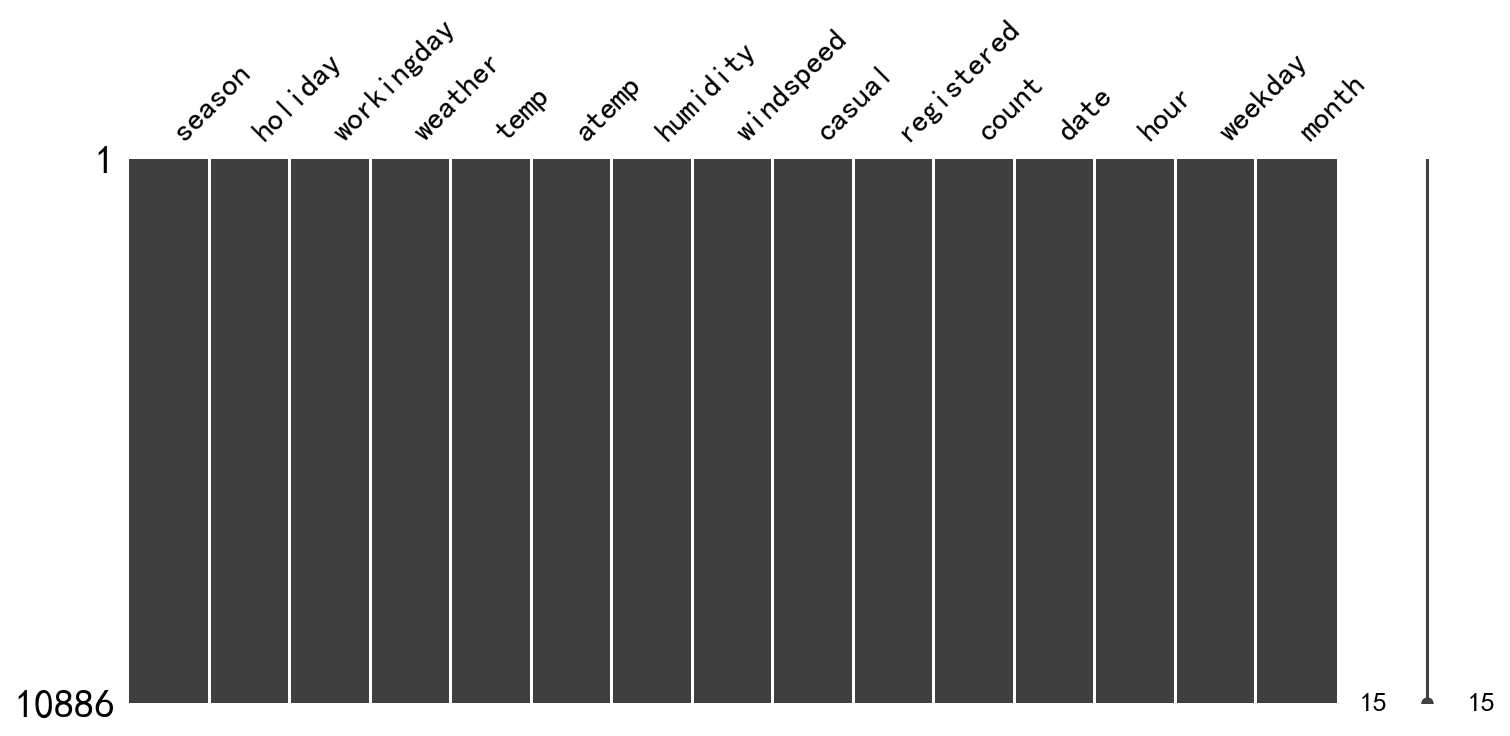

In [13]:
import missingno as msno

msno.matrix(daily_data, figsize=(12, 5))
plt.show()

## Outliers Analysis

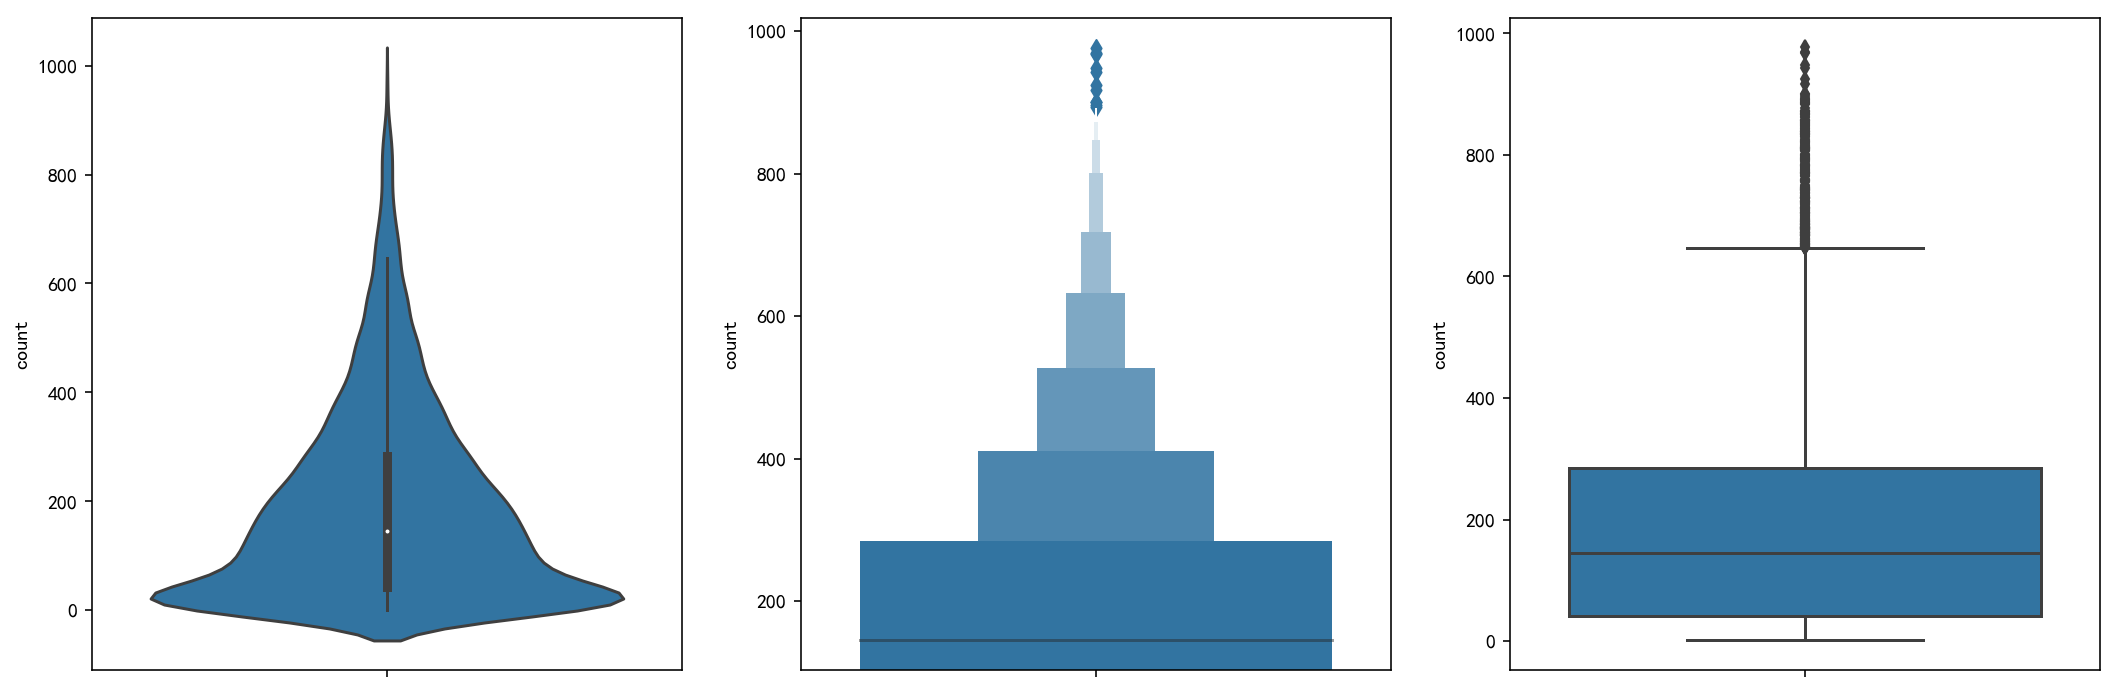

In [14]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18, 6)
# orient='h' 水平方向
sns.violinplot(data=daily_data, y='count', orient='v', ax=axes[0])
sns.boxenplot(data=daily_data, y='count', orient='v', ax=axes[1])
sns.boxplot(data=daily_data, y='count', orient='v', ax=axes[2])
plt.show()

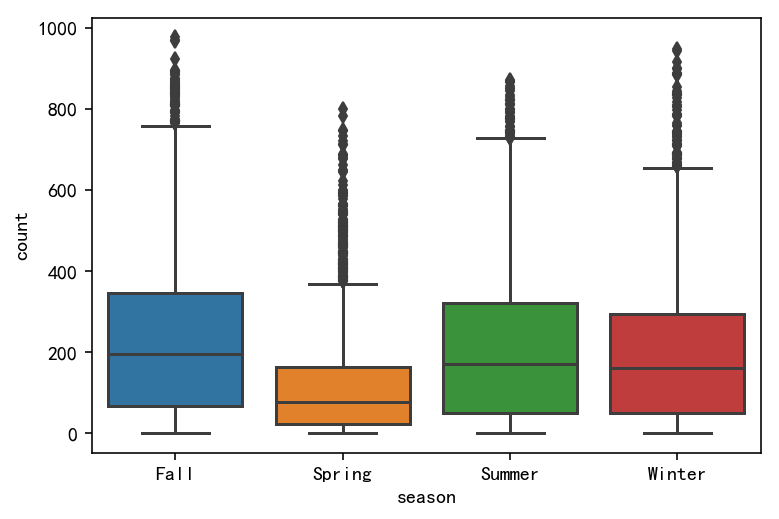

In [15]:
sns.boxplot(data=daily_data, y='count', x='season', orient='v')
plt.show()

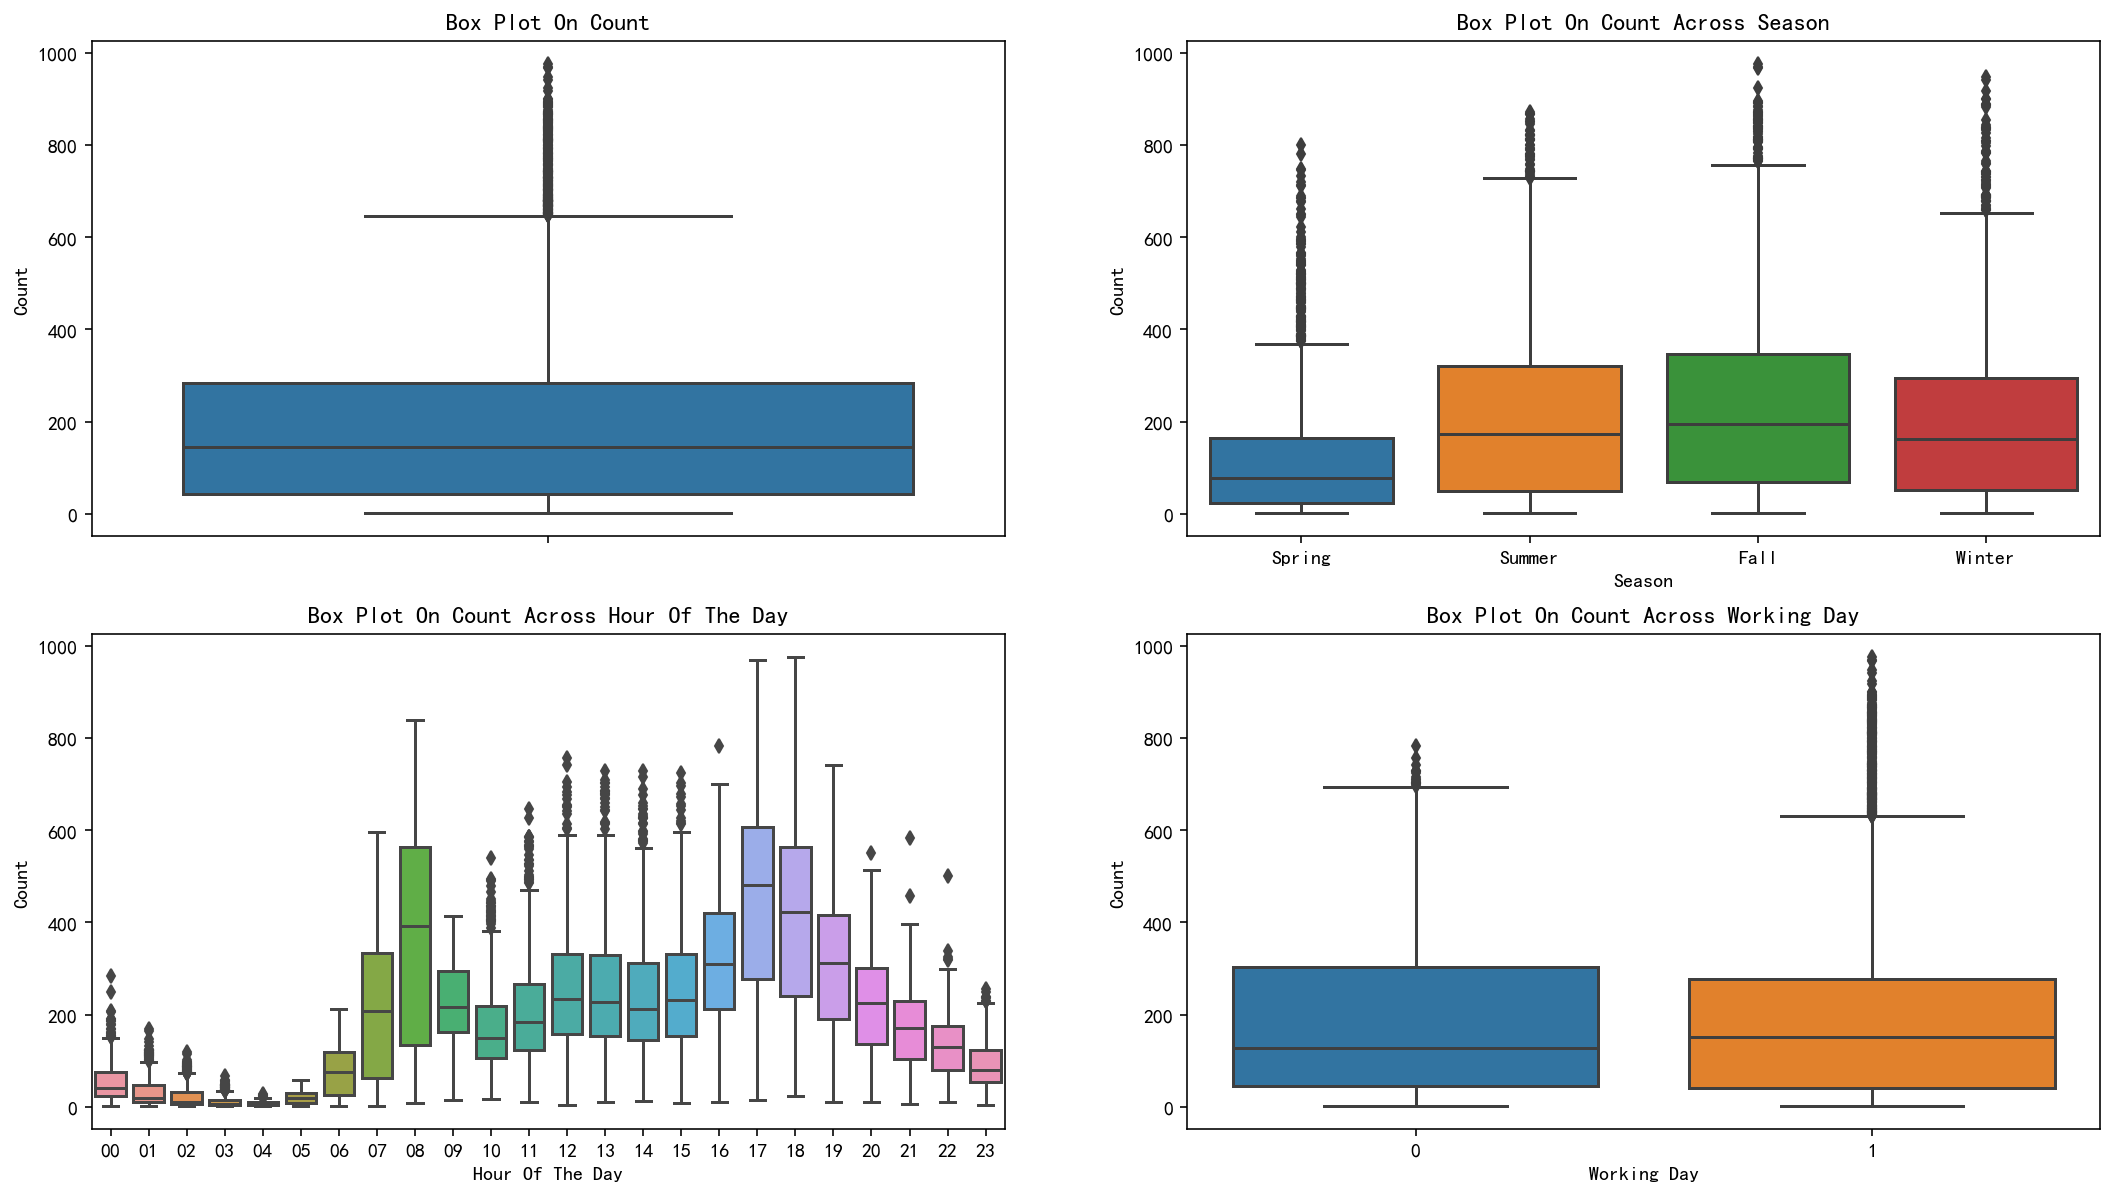

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 10)

# 只针对一个变量画箱线图
sns.boxplot(data=daily_data, y='count', orient='v', ax=axes[0][0])
sns.boxplot(
    data=daily_data,
    y='count',
    x='season',
    orient='v',
    ax=axes[0][1],
    order=['Spring', 'Summer', 'Fall', 'Winter'])
sns.boxplot(data=daily_data, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(
    data=daily_data, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='Count', title='Box Plot On Count')
axes[0][1].set(
    xlabel='Season', ylabel='Count', title='Box Plot On Count Across Season')
axes[1][0].set(
    xlabel='Hour Of The Day',
    ylabel='Count',
    title='Box Plot On Count Across Hour Of The Day')
axes[1][1].set(
    xlabel='Working Day',
    ylabel='Count',
    title='Box Plot On Count Across Working Day')

plt.show()

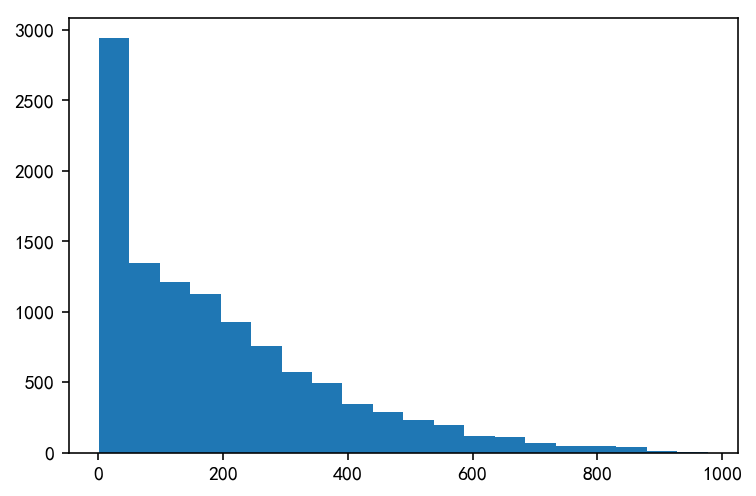

In [17]:
plt.hist(daily_data['count'], bins=20)
plt.show()

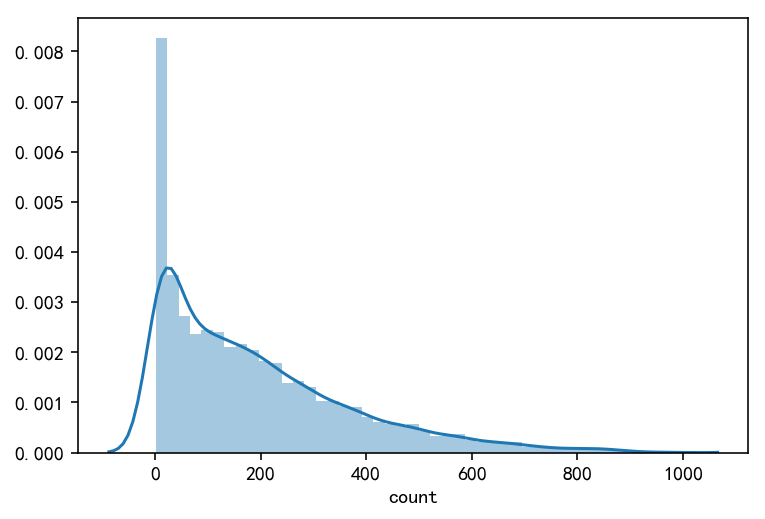

In [18]:
sns.distplot(daily_data['count'])
plt.show()

## 去掉离群点

https://www.jianshu.com/p/af97f698694c

In [19]:
daily_data['count'].quantile(0.25)

42.0

In [20]:
daily_data['count'].quantile(0.75)

284.0

In [21]:
daily_data['count'].mean()

191.57413191254824

In [22]:
daily_data['count'].std()

181.14445383028527

In [23]:
import numpy as np

filter_condition = np.abs(daily_data['count'] - daily_data['count'].mean()
                          ) <= 3 * daily_data['count'].std()

daily_data_without_outliers = daily_data[filter_condition]

In [24]:
daily_data.shape

(10886, 15)

In [25]:
daily_data_without_outliers.shape

(10739, 15)

可以看到，的确是有一些离群数据被删除了。

In [26]:
daily_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [27]:
corr_matt = daily_data[[
    'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'
]].corr()
corr_matt

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [28]:
# Return the indices for the lower-triangle of arr.
# 返回 arr 的下三角形的索引。
mask = np.array(corr_matt)
mask

array([[ 1.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.98494811,  1.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [-0.06494877, -0.04353571,  1.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [-0.01785201, -0.057473  , -0.31860699,  1.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.46709706,  0.46206654, -0.3481869 ,  0.09227619,  1.        ,
         0.49724969,  0.69041357],
       [ 0.31857128,  0.31463539, -0.26545787,  0.09105166,  0.49724969,
         1.        ,  0.97094811],
       [ 0.39445364,  0.38978444, -0.31737148,  0.10136947,  0.69041357,
         0.97094811,  1.        ]])

In [29]:
# 把下三角那部分都搞成 0
mask[np.tril_indices_from(corr_matt)] = False

In [30]:
pd.DataFrame(mask)

,0,1,2,3,4,5,6
0,0.0,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
1,0.0,0.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
2,0.0,0.000000,0.000000,-0.318607,-0.348187,-0.265458,-0.317371
3,0.0,0.000000,0.000000,0.000000,0.092276,0.091052,0.101369
4,0.0,0.000000,0.000000,0.000000,0.000000,0.497250,0.690414
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.970948
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


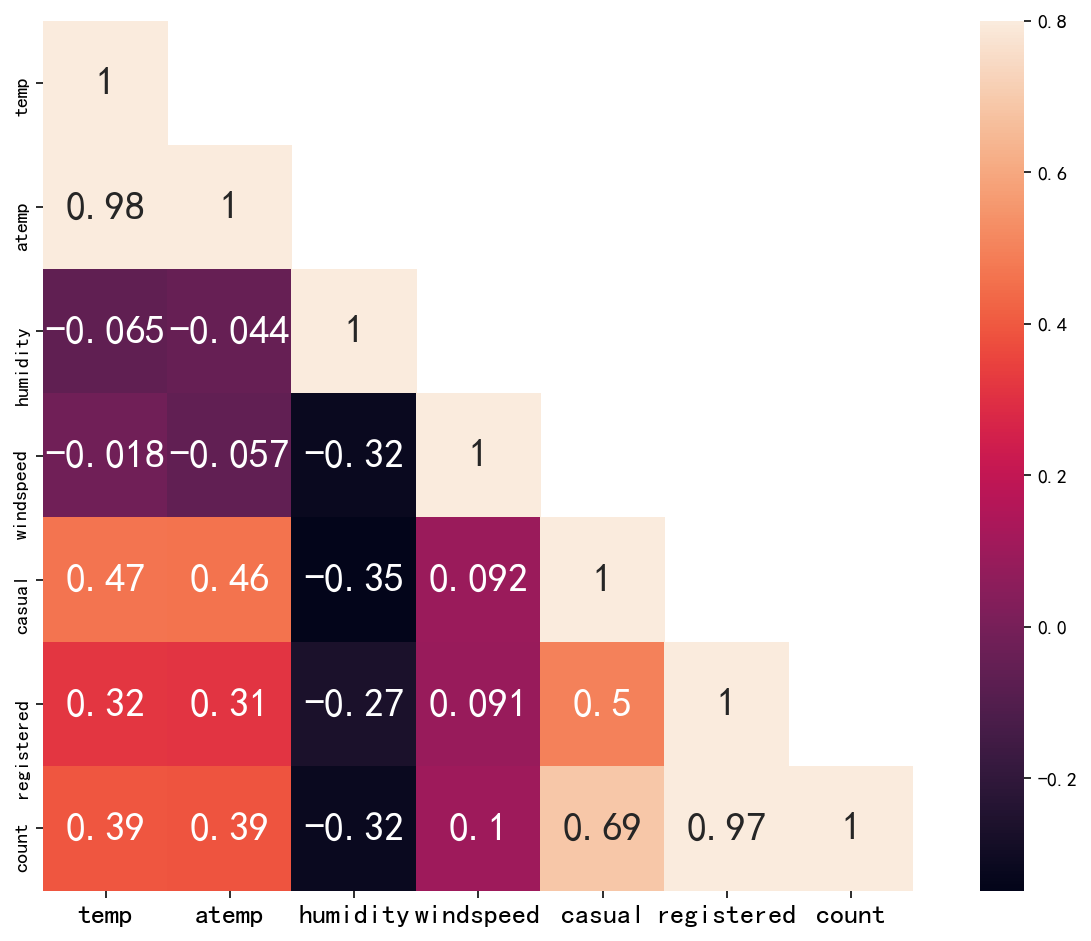

In [31]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# mask 另外半边不显示
sns.heatmap(
    corr_matt,
    mask=mask,
    vmax=.8,
    square=True,
    annot=True,
    annot_kws={
        'fontsize': 20
    })
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)

plt.show()

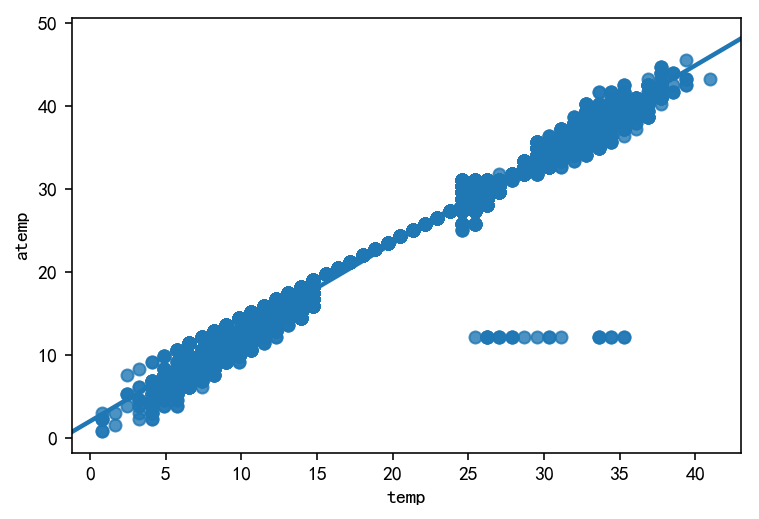

In [32]:
# temp 和 atemp 高度线性相关，二者选其一即可
sns.regplot(x='temp', y='atemp', data=daily_data)
plt.show()

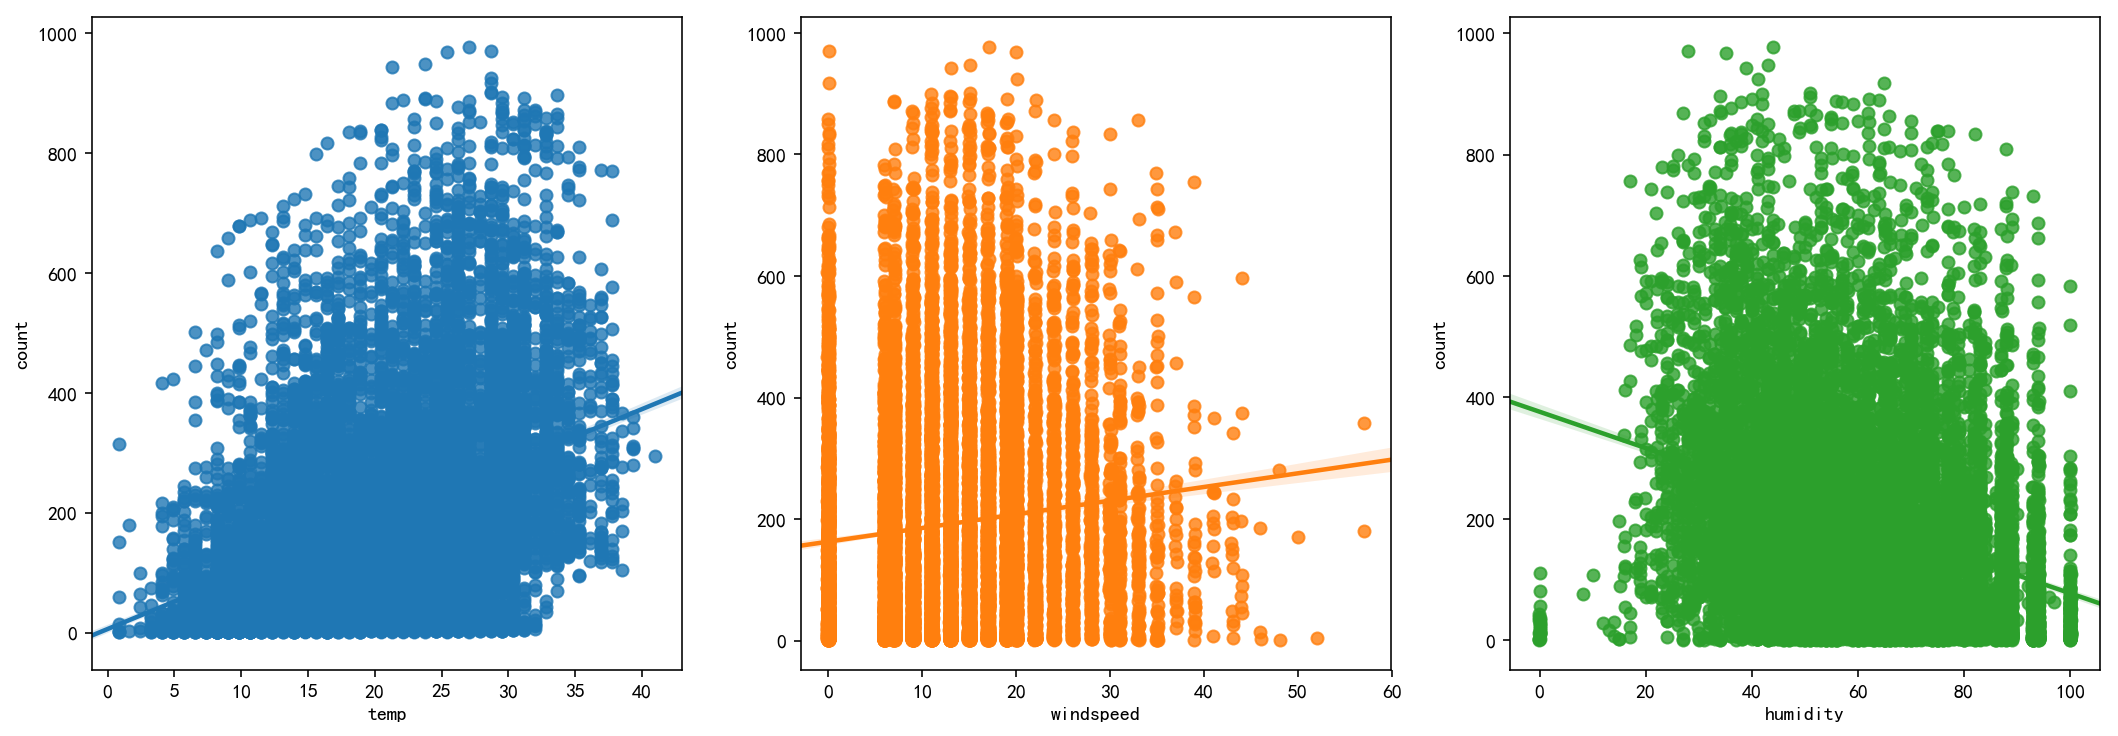

In [33]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)

sns.regplot(x='temp', y='count', data=daily_data, ax=ax1)  # 温度
sns.regplot(
    x='windspeed', y='count', data=daily_data, ax=ax2, x_jitter=.1)  # 风俗
sns.regplot(
    x='humidity', y='count', data=daily_data, ax=ax3, x_jitter=.1)  # 湿度
plt.show()

从下图中可以看出，“计数”变量向右倾斜。由于大多数机器学习技术要求因变量为正常，因此希望具有正态分布。一种可能的解决方案是在删除异常值数据点后对“count”变量进行日志转换。在转换之后，数据看起来好多了，但仍然没有理想地遵循正态分布。

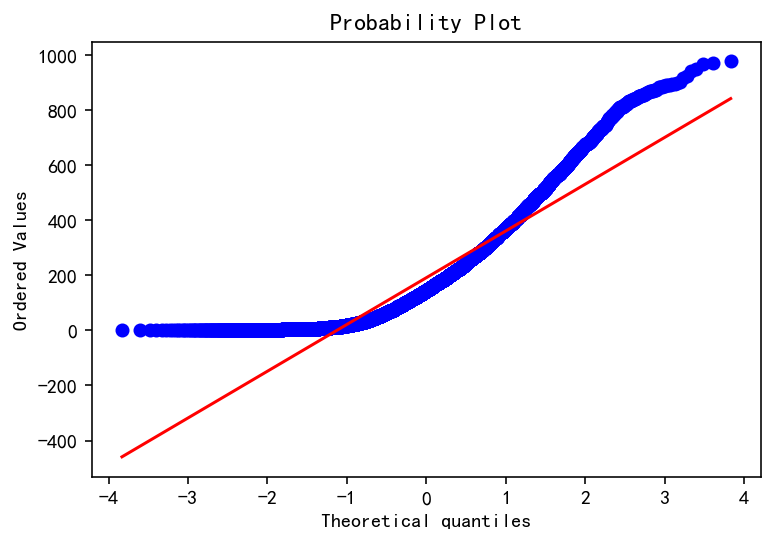

In [34]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html

from scipy import stats

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(daily_data['count'], dist='norm', fit=True, plot=ax)
plt.show()

`np.log1p` 把变量弄成近似正态分布。

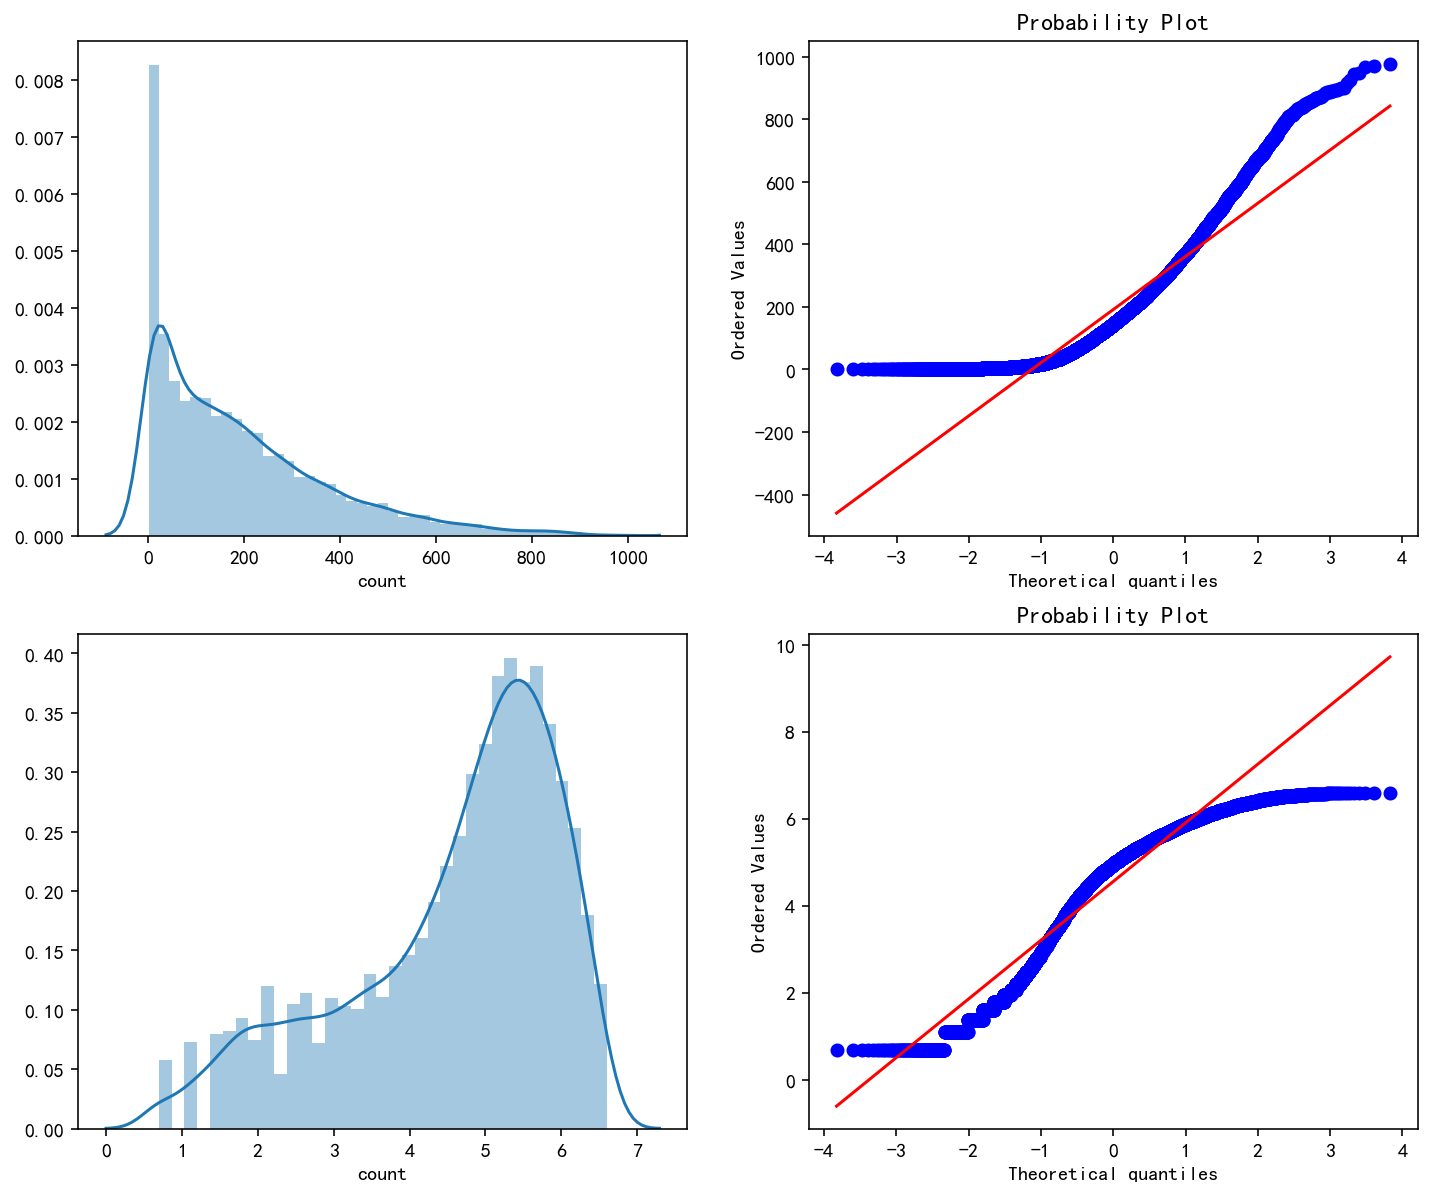

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(daily_data['count'], ax=axes[0][0])
stats.probplot(daily_data['count'], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(np.log1p(daily_data_without_outliers['count']), ax=axes[1][0])
stats.probplot(
    np.log1p(daily_data_without_outliers['count']),
    dist='norm',
    fit=True,
    plot=axes[1][1])

plt.show()

## 绘图：4 张表

In [36]:
daily_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [37]:
# 按照每个月的 count 的平均值，绘制一个 bar 图，其实也可以绘制 point 图
month_count_aggregated = daily_data.groupby('month')[
    'count'].mean().reset_index()
month_count_aggregated

,month,count
0,April,184.160616
1,August,234.118421
2,December,175.614035
3,February,110.003330
4,January,90.366516
5,July,235.325658
6,June,242.031798
7,March,148.169811
8,May,219.459430
9,November,193.677278


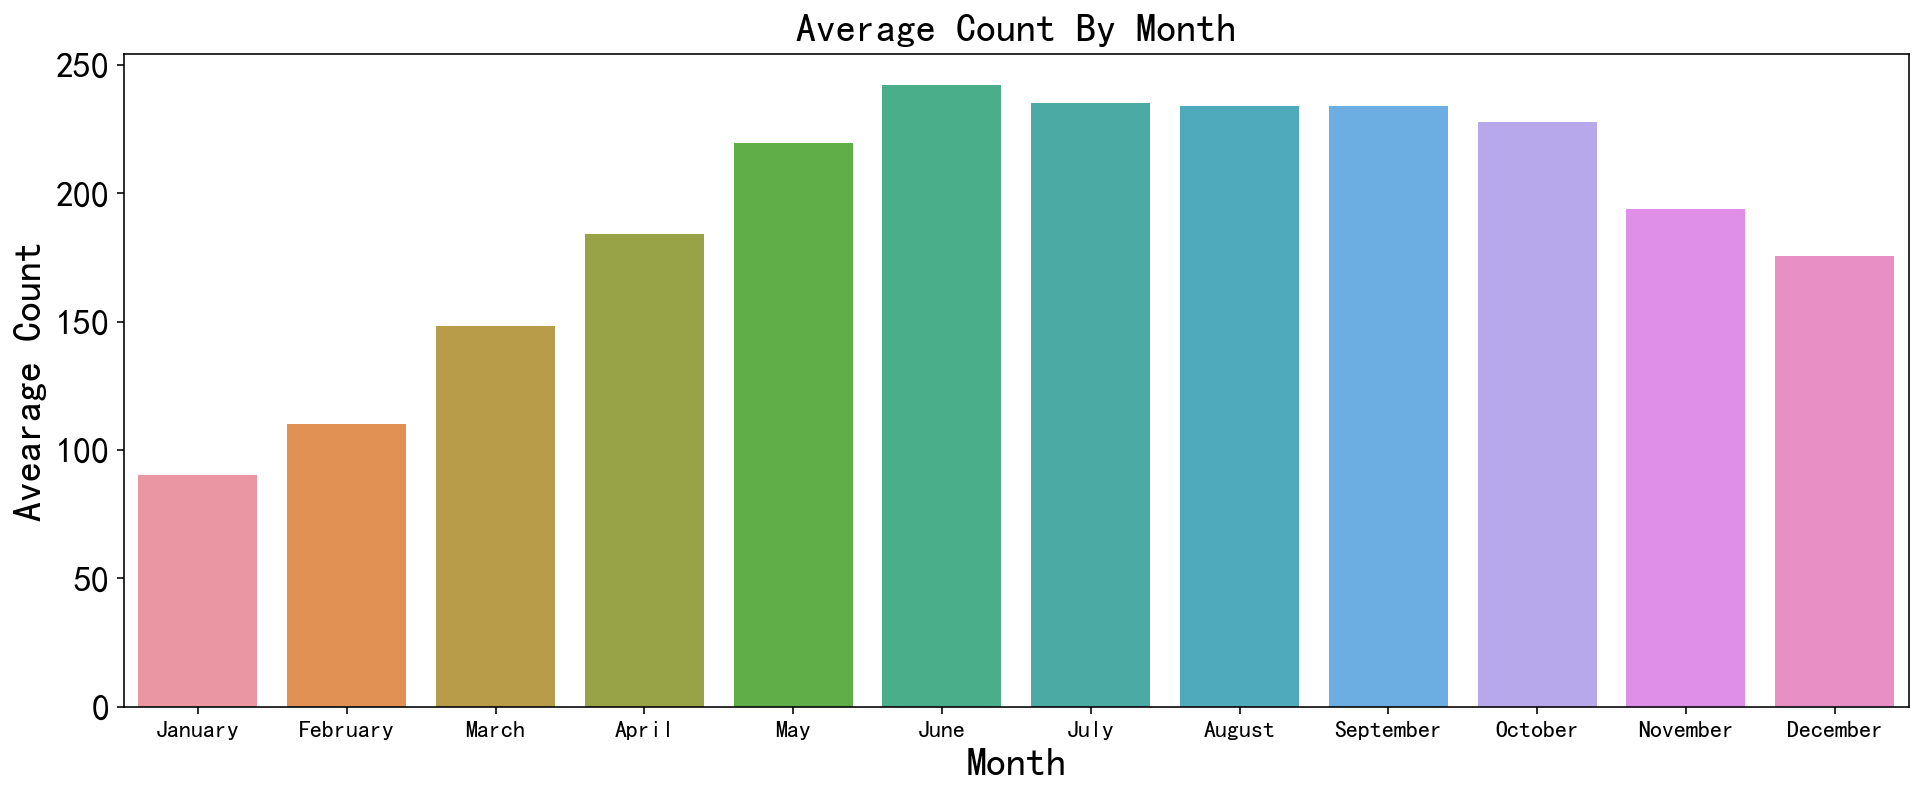

In [38]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# order 属性，指定顺序
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

sort_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

sns.barplot(
    data=month_count_aggregated, x='month', y='count', order=sort_order, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)

ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Avearage Count', fontsize=20)
ax.set_title('Average Count By Month', fontsize=20)
plt.show()

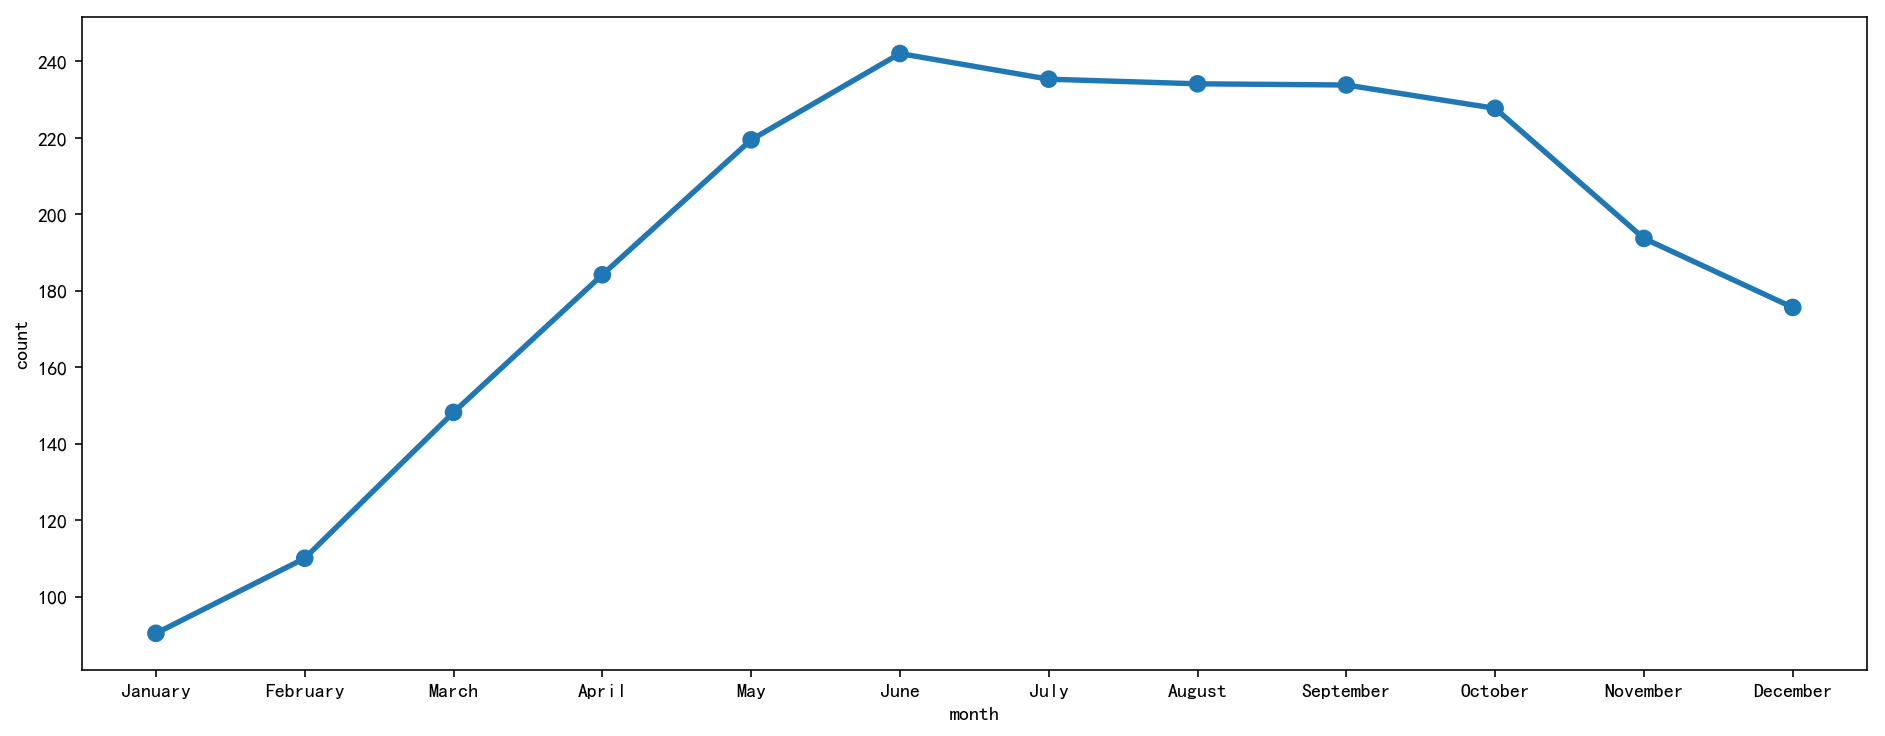

In [39]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
sns.pointplot(
    x="month", y="count", data=month_count_aggregated, order=sort_order, ax=ax)
plt.show()

In [40]:
# 每个小时都分 春 夏 秋 冬 统计平均数
hour_season_aggregated = daily_data.groupby(
    ['hour', 'season'])['count'].mean().reset_index()
hour_season_aggregated

,hour,season,count
0,00,Fall,75.675439
1,00,Spring,28.292035
2,00,Summer,58.473684
3,00,Winter,57.877193
4,01,Fall,44.831858
5,01,Spring,18.761062
6,01,Summer,35.640351
7,01,Winter,36.166667
8,02,Fall,31.707965
9,02,Spring,13.205607


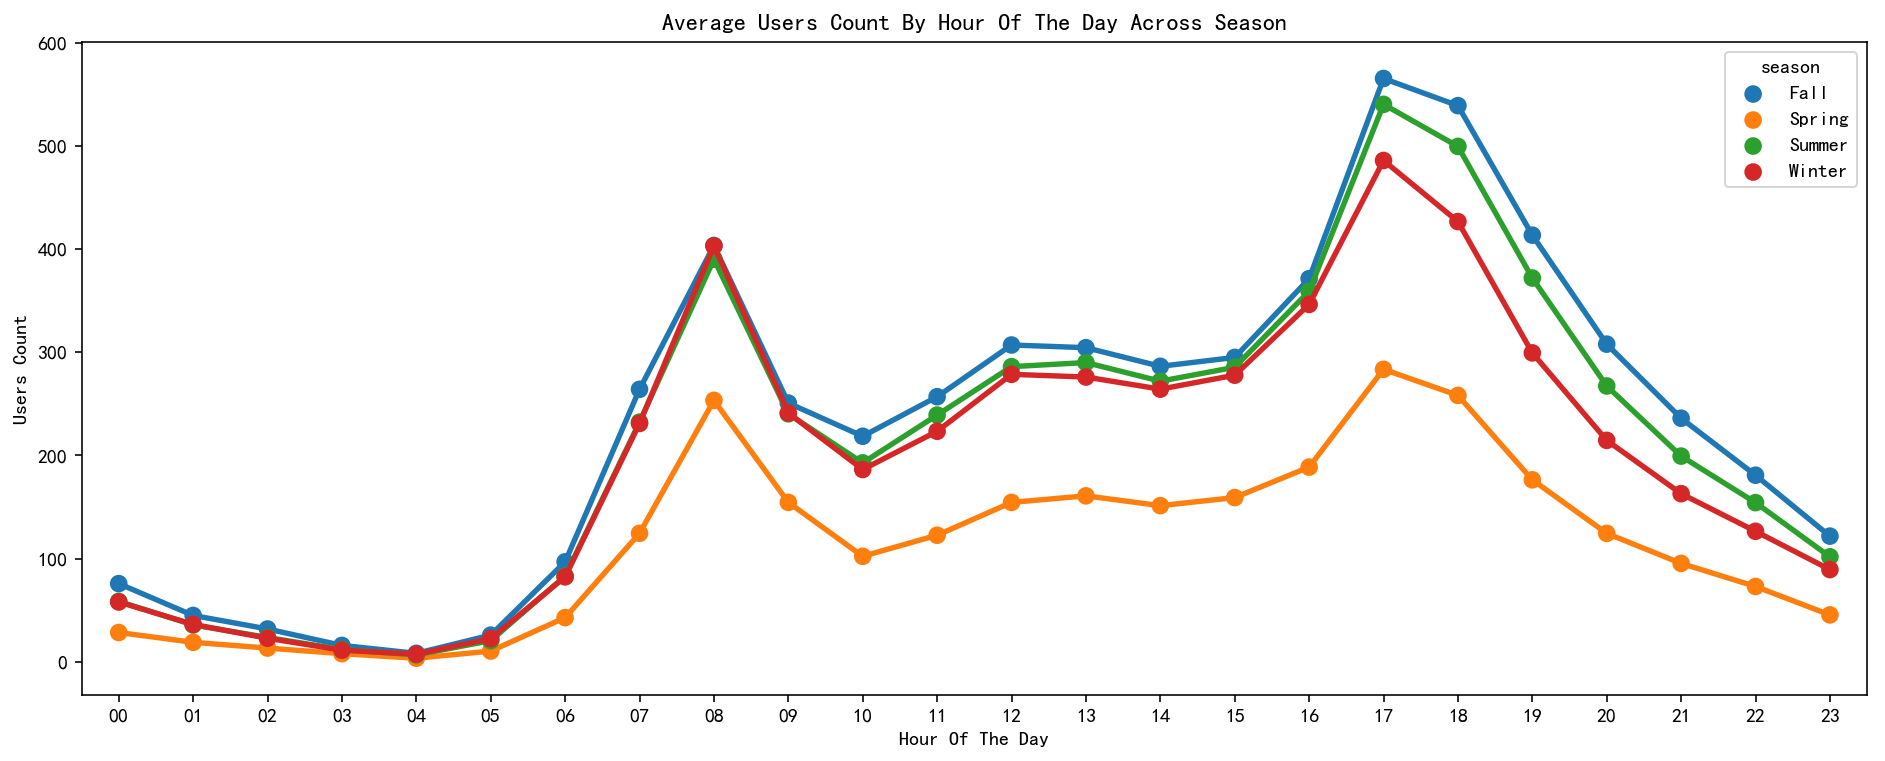

In [41]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
sns.pointplot(
    x='hour',
    y='count',
    hue='season',
    data=hour_season_aggregated,
    join=True,
    ax=ax)
ax.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across Season',
    label='big')
plt.show()

In [42]:
# 每个小时，都按照星期几求平均数，可以看出周末的曲线和平时不一样
# sort=True
hour_weekday_aggregated = daily_data.groupby(
    ['hour', 'weekday'])['count'].mean().reset_index()
hour_weekday_aggregated

,hour,weekday,count
0,00,Friday,53.234375
1,00,Monday,35.492308
2,00,Saturday,98.212121
3,00,Sunday,96.227273
4,00,Thursday,37.476923
5,00,Tuesday,27.328125
6,00,Wednesday,36.246154
7,01,Friday,24.453125
8,01,Monday,18.076923
9,01,Saturday,70.015152


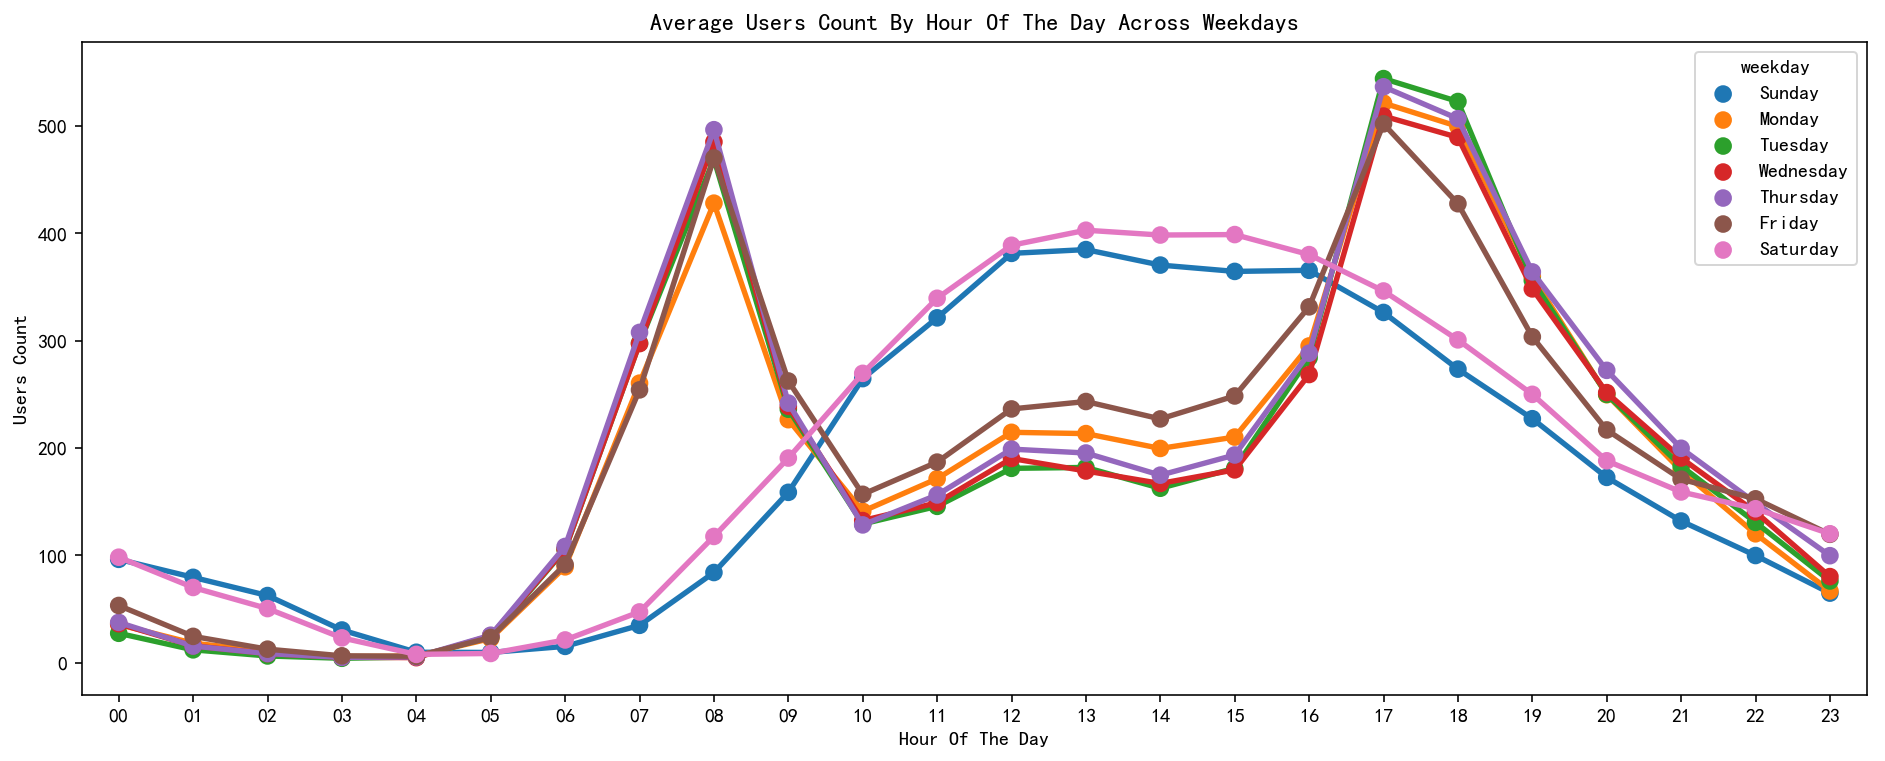

In [43]:
weekday_order = [
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday'
]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
sns.pointplot(
    x='hour',
    y='count',
    hue='weekday',
    hue_order=weekday_order,
    data=hour_weekday_aggregated,
    join=True,
    ax=ax)
ax.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across Weekdays',
    label='big')
plt.show()

In [44]:
# casual- 已启动的非注册用户租赁数量
# registered- 已启动的注册用户租赁数量
daily_data[['hour', 'casual', 'registered']].shape

(10886, 3)

In [45]:
daily_data[['hour', 'casual', 'registered']].head()

,hour,casual,registered
0,00,3,13
1,01,8,32
2,02,5,27
3,03,3,10
4,04,0,1


In [46]:
hour_casual_registered_transformed = pd.melt(
    daily_data[['hour', 'casual', 'registered']],
    id_vars=['hour'],
    value_vars=['casual', 'registered'])
hour_casual_registered_transformed.shape

(21772, 3)

In [47]:
10886 * 2

21772

In [48]:
hour_casual_registered_transformed.head()

,hour,variable,value
0,00,casual,3
1,01,casual,8
2,02,casual,5
3,03,casual,3
4,04,casual,0


In [49]:
# sort=True
hour_aggregated = hour_casual_registered_transformed.groupby(
    ['hour', 'variable'], )['value'].mean().reset_index()
hour_aggregated

,hour,variable,value
0,00,casual,10.312088
1,00,registered,44.826374
2,01,casual,6.513216
3,01,registered,27.345815
4,02,casual,4.819196
5,02,registered,18.080357
6,03,casual,2.681293
7,03,registered,9.076212
8,04,casual,1.262443
9,04,registered,5.144796


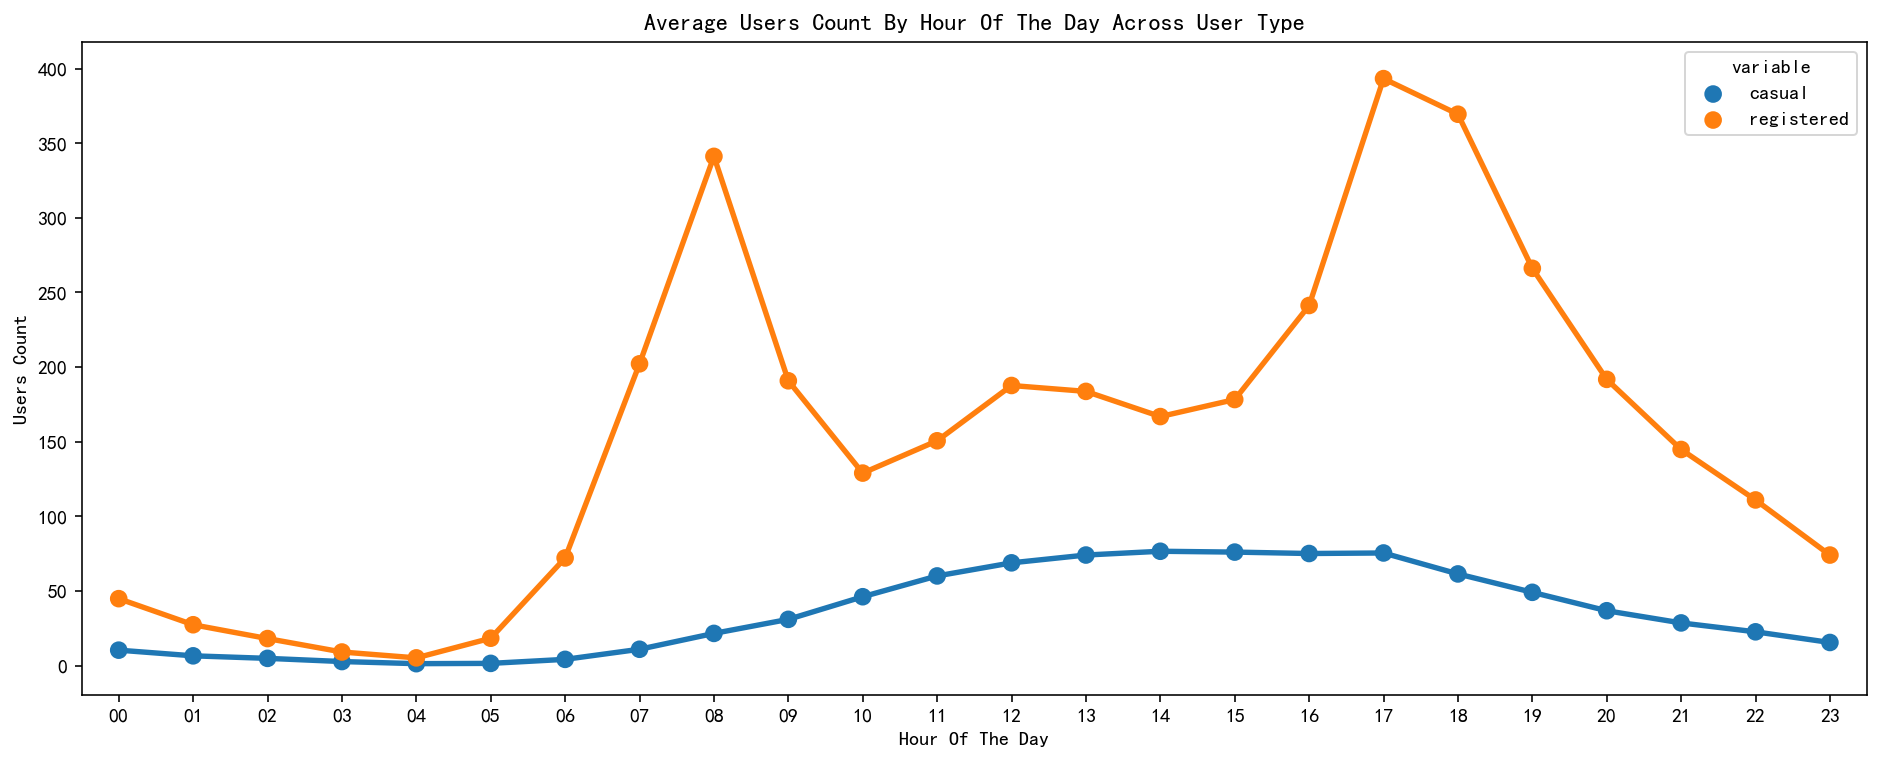

In [50]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

sns.pointplot(
    x='hour',
    y='value',
    hue='variable',
    hue_order=['casual', 'registered'],
    data=hour_aggregated,
    join=True,
    ax=ax)
ax.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across User Type',
    label='big')
plt.show()

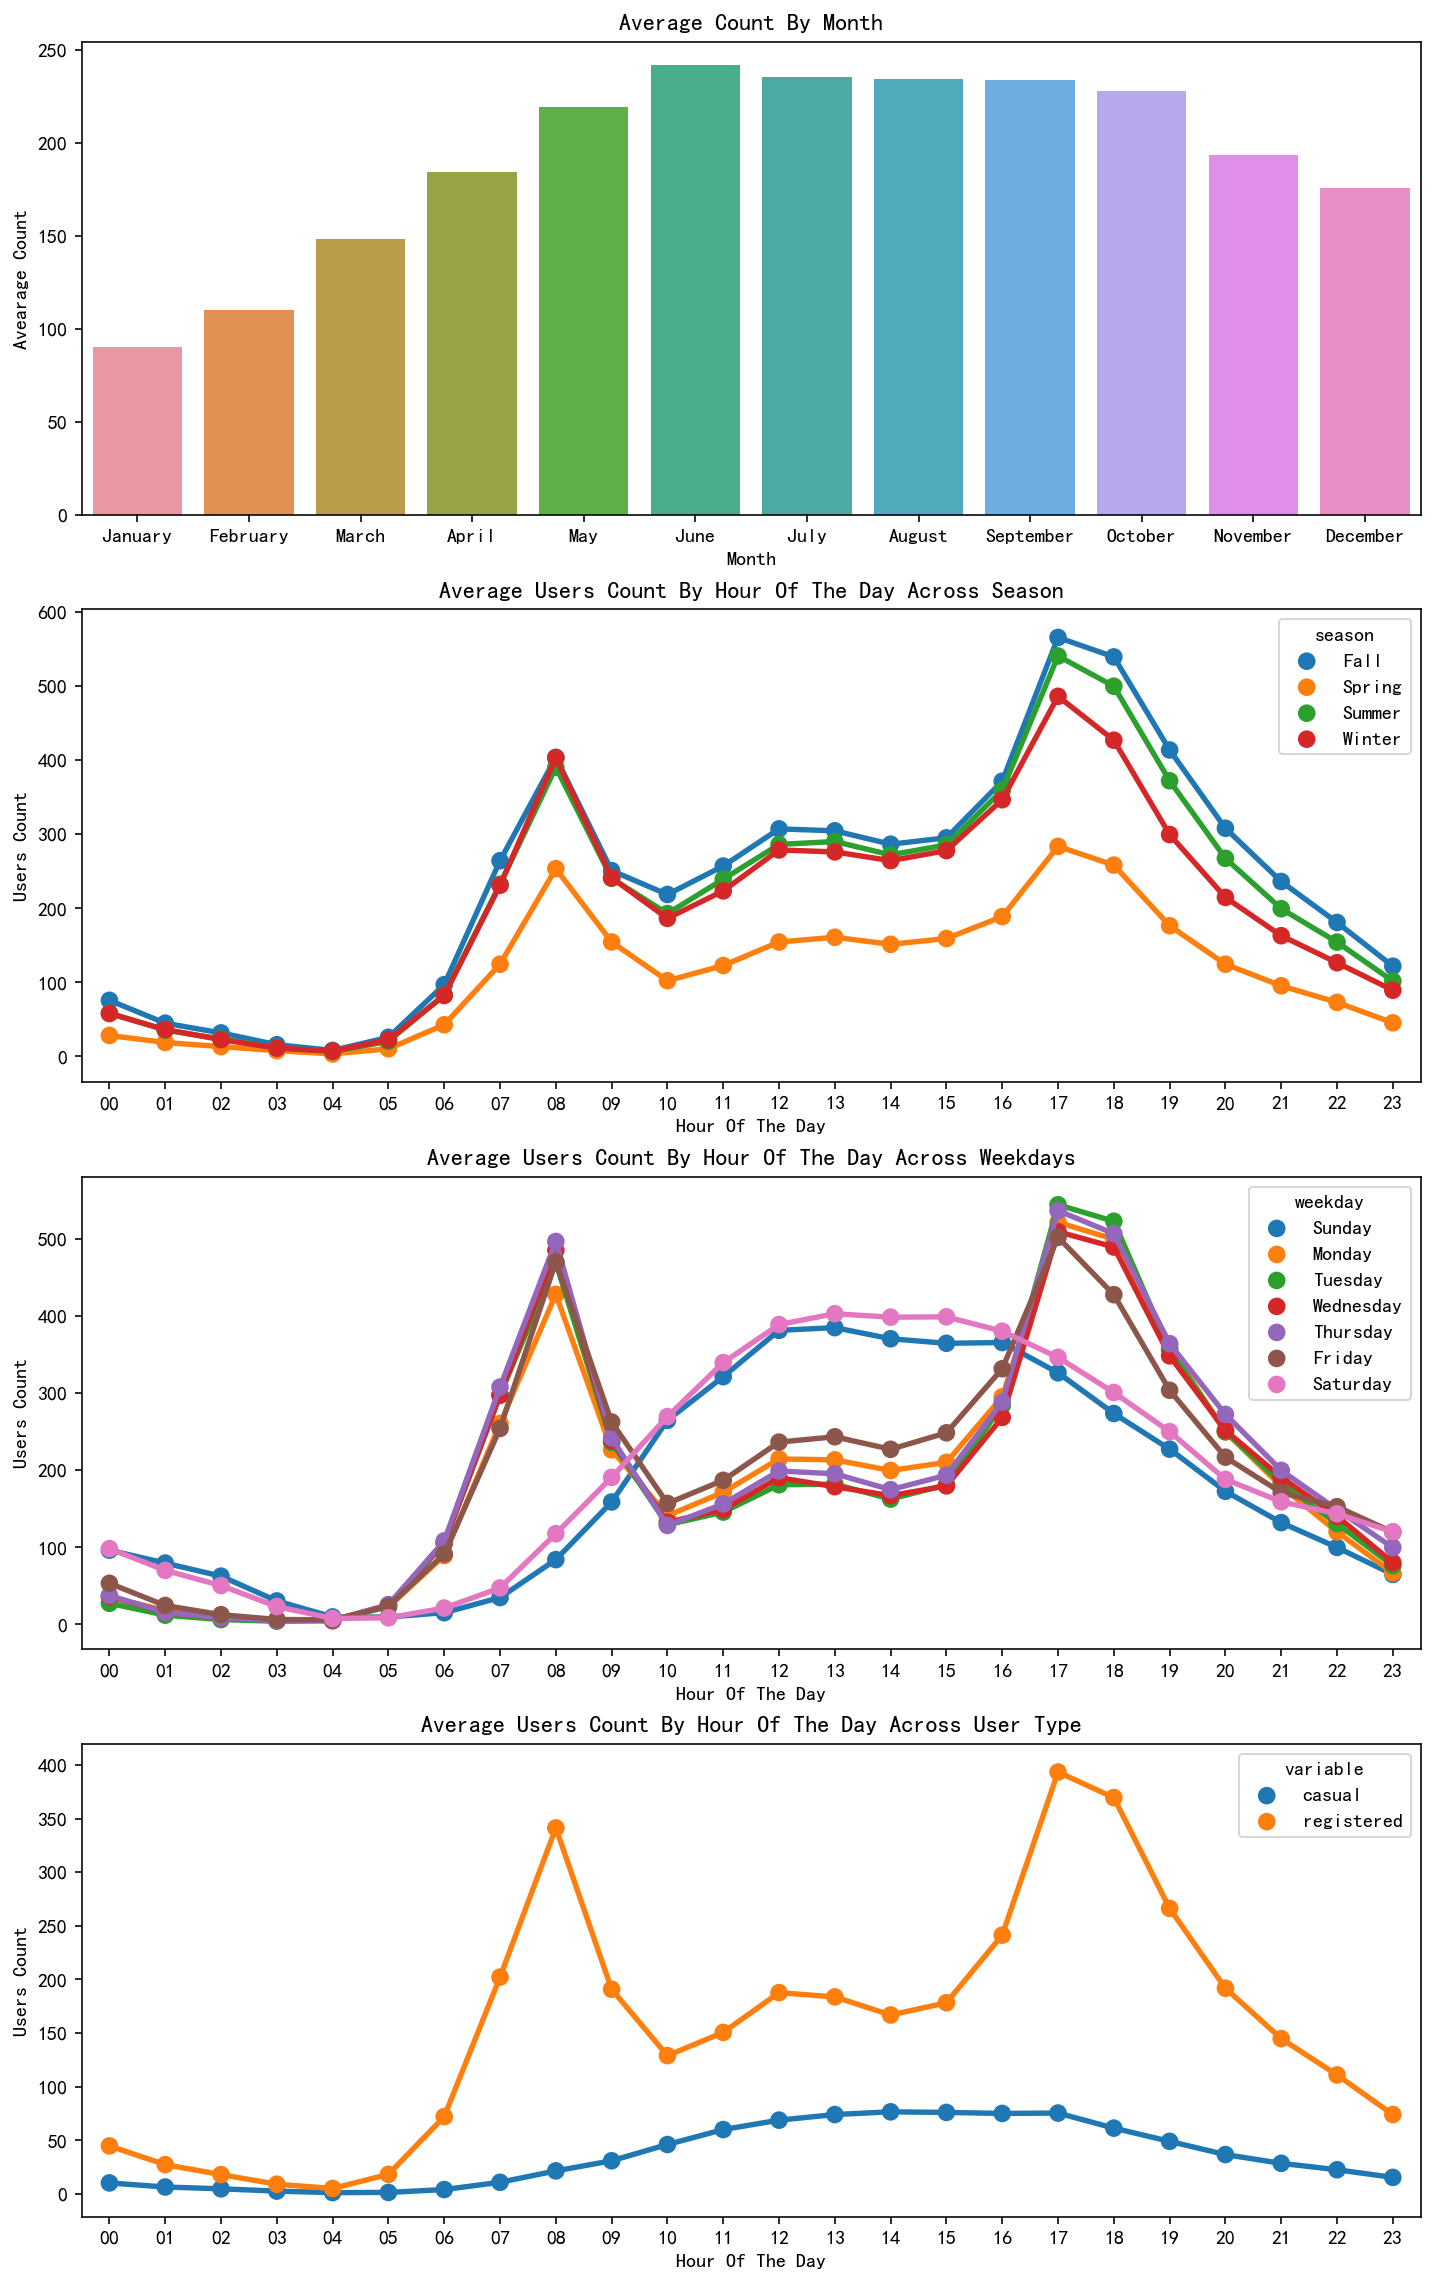

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12, 20)

# order 属性，指定顺序
sns.barplot(
    data=month_count_aggregated,
    x='month',
    y='count',
    ax=ax1,
    order=sort_order)
ax1.set(
    xlabel='Month', ylabel='Avearage Count', title='Average Count By Month')
# ax1.set_xlabel('Month', fontdict={'fontsize': 20})

# https://seaborn.pydata.org/generated/seaborn.pointplot.html
sns.pointplot(
    x='hour',
    y='count',
    hue='season',
    data=hour_season_aggregated,
    join=True,
    ax=ax2)
ax2.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across Season',
    label='big')

sns.pointplot(
    x='hour',
    y='count',
    hue='weekday',
    hue_order=weekday_order,
    data=hour_weekday_aggregated,
    join=True,
    ax=ax3)

ax3.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across Weekdays',
    label='big')

sns.pointplot(
    x='hour',
    y='value',
    hue='variable',
    hue_order=['casual', 'registered'],
    data=hour_aggregated,
    join=True,
    ax=ax4)
ax4.set(
    xlabel='Hour Of The Day',
    ylabel='Users Count',
    title='Average Users Count By Hour Of The Day Across User Type',
    label='big')

plt.show()